In [5]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


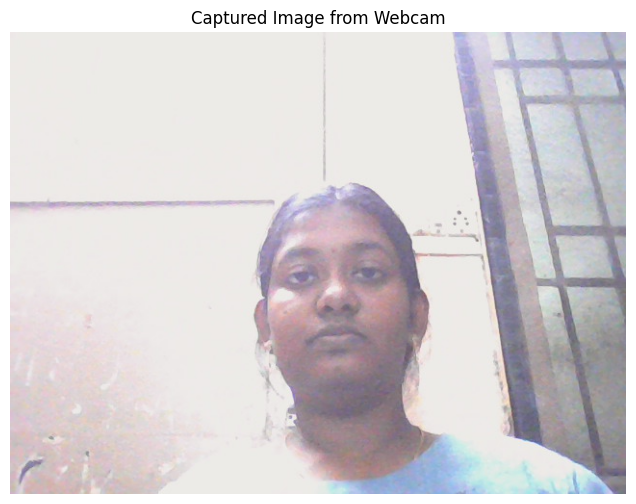

In [6]:
import cv2
import matplotlib.pyplot as plt

# Initialize the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Could not open webcam")
else:
    ret, frame = cap.read()  # Capture a single frame
    cap.release()  # Release the webcam

    if ret:
        # Convert the frame from BGR (OpenCV default) to RGB (Matplotlib default)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8,6))
        plt.imshow(frame_rgb)
        plt.axis("off")
        plt.title("Captured Image from Webcam")
        plt.show()
    else:
        print("Failed to capture image")

In [7]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Could not open webcam")
else:
    frame_count = 0
    max_frames = 50  # Capture 50 frames and then stop
    frames = []
    
    while frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
        frame_count += 1

    cap.release()
    
    # Display the last captured frame inline
    frame_rgb = cv2.cvtColor(frames[-1], cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,6))
    plt.imshow(frame_rgb)
    plt.axis("off")
    plt.title("Last Captured Frame")
    plt.show()


In [8]:
with open("sentiment_model.pkl", "rb") as f:
    print(f.read(10))  # Print first 10 bytes


b'\x80\x04\x951\x03\x00\x00\x00\x00\x00'


In [9]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Example: Training a simple model
X_train = ["I love this!", "This is terrible!", "I feel great", "I am so sad"]
y_train = ["positive", "negative", "positive", "negative"]

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Save the model and vectorizer properly
with open("sentiment_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [10]:
import sklearn
print(sklearn.__version__)


1.5.1


In [11]:
with open("sentiment_model.pkl", "r", errors="ignore") as f:
    print(f.read(100))  # Read first 100 characters


€•1      Œsklearn.linear_model._logistic”ŒLogisticRegression”“”)”}”(Œpenalty”Œl2”Œdual”‰Œtol


In [12]:
with open("sentiment_model.pkl", "rb") as model_file:
    sentiment_model = pickle.load(model_file)

with open("tfidf_vectorizer.pkl", "rb") as vec_file:
    tfidf_vectorizer = pickle.load(vec_file)

print("Model loaded successfully!")


Model loaded successfully!


In [13]:
def preprocess_text(text):
    """
    This is a placeholder function for text preprocessing.
    Replace or extend this with your actual preprocessing steps,
    such as lowercasing, removing punctuation, tokenizing, etc.
    """
    return text.lower().strip()

In [14]:
import pickle

# Load the sentiment analysis model and vectorizer
with open("sentiment_model.pkl", "rb") as model_file:
    sentiment_model = pickle.load(model_file)

with open("tfidf_vectorizer.pkl", "rb") as vec_file:
    tfidf_vectorizer = pickle.load(vec_file)

def predict_text_sentiment(text):
    """Preprocess text and predict sentiment"""
    # (Assume you have a preprocess_text function defined)
    processed_text = preprocess_text(text)
    features = tfidf_vectorizer.transform([processed_text])
    prediction = sentiment_model.predict(features)[0]
    return prediction


In [15]:
from deepface import DeepFace


In [16]:
import h5py

file_path = r"C:\Users\sastihasini\Documents\mental health tracker\facial_expression_model_weights (1).h5"

try:
    with h5py.File(file_path, 'r') as f:
        print("HDF5 file loaded successfully!")
except Exception as e:
    print("Error loading HDF5 file:", e)


HDF5 file loaded successfully!


In [17]:
import os
os.environ['DEEPFACE_HOME'] = r"C:\Users\sastihasini\.deepface"


In [18]:
import cv2
from deepface import DeepFace
import os

# Ensure DeepFace finds the model in the correct directory
os.environ['DEEPFACE_HOME'] = r"C:\Users\sastihasini\.deepface"


def detect_facial_emotion():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cap.release()
    
    if not ret:
        return "Not Detected"

    try:
        # Set the correct backend
        result = DeepFace.analyze(frame, actions=['emotion'], 
                                  detector_backend='retinaface', 
                                  enforce_detection=False)
        
        # Extract dominant emotion
        emotion = result[0]['dominant_emotion'] if isinstance(result, list) else result['dominant_emotion']
    
    except Exception as e:
        print("Facial analysis error:", e)
        emotion = "Not Detected"

    return emotion


In [19]:
def detect_facial_emotion():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cap.release()
    if not ret:
        return "Not Detected"
    try:
        # Use the OpenCV detector to avoid tf_keras issues
        result = DeepFace.analyze(frame, actions=['emotion'], detector_backend='mtcnn', enforce_detection=False)
        # Adjust based on DeepFace output format:
        emotion = result[0]['dominant_emotion'] if isinstance(result, list) else result['dominant_emotion']
    except Exception as e:
        print("Facial analysis error:", e)
        emotion = "Not Detected"
    return emotion

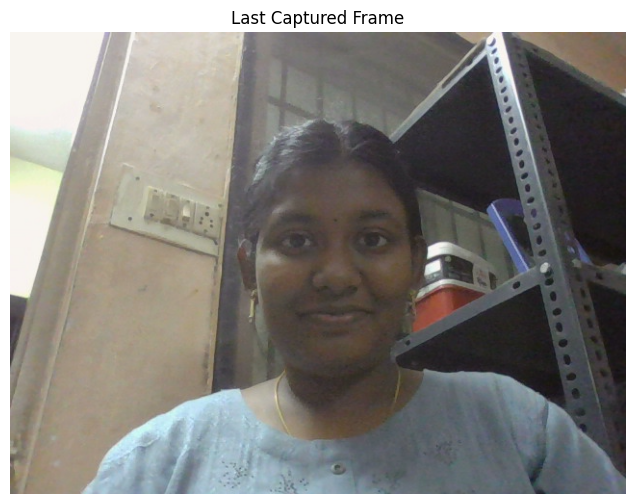

In [38]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Could not open webcam")
else:
    frame_count = 0
    max_frames = 50  # Capture 50 frames and then stop
    frames = []
    
    while frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
        frame_count += 1

    cap.release()
    
    # Display the last captured frame inline
    frame_rgb = cv2.cvtColor(frames[-1], cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,6))
    plt.imshow(frame_rgb)
    plt.axis("off")
    plt.title("Last Captured Frame")
    plt.show()

In [39]:
print("Detected Facial Emotion:", detect_facial_emotion())

Detected Facial Emotion: ('neutral', array([[[240, 245, 248],
        [240, 245, 248],
        [240, 245, 248],
        ...,
        [109, 116, 119],
        [107, 115, 117],
        [108, 117, 118]],

       [[240, 245, 248],
        [240, 245, 248],
        [240, 245, 248],
        ...,
        [107, 115, 118],
        [105, 114, 118],
        [104, 114, 117]],

       [[240, 245, 248],
        [240, 245, 248],
        [240, 245, 248],
        ...,
        [103, 114, 119],
        [101, 112, 119],
        [101, 112, 119]],

       ...,

       [[ 95, 108, 112],
        [ 98, 111, 116],
        [102, 114, 122],
        ...,
        [116, 110, 103],
        [115, 109, 103],
        [115, 109, 103]],

       [[ 94, 111, 112],
        [ 97, 113, 116],
        [100, 116, 122],
        ...,
        [118, 111, 102],
        [117, 110, 102],
        [116, 109, 101]],

       [[ 94, 112, 112],
        [ 96, 114, 115],
        [ 99, 117, 121],
        ...,
        [118, 111, 101],
        [116

In [40]:
import cv2
from deepface import DeepFace
import os

# Set DEEPFACE_HOME so DeepFace knows where to look for model weights
os.environ['DEEPFACE_HOME'] = r"C:\Users\sastihasini\.deepface"

# Dummy functions for sentiment analysis; replace with your actual implementations.
def preprocess_text(text):
    return text.lower().strip()

def predict_text_sentiment(text):
    processed_text = preprocess_text(text)
    # For demonstration: if "good" is in text, sentiment is positive; otherwise negative.
    return "positive" if "good" in processed_text else "negative"

# Function to capture facial emotion and return both the emotion and the frame.
def detect_facial_emotion():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cap.release()
    
    if not ret:
        return "Not Detected", None

    try:
        # Use the OpenCV detector to avoid tf_keras issues; you can experiment with others too.
        result = DeepFace.analyze(frame, actions=['emotion'], detector_backend='opencv', enforce_detection=False)
        emotion = result[0]['dominant_emotion'] if isinstance(result, list) else result['dominant_emotion']
    except Exception as e:
        print("Facial analysis error:", e)
        emotion = "Not Detected"
    return emotion, frame

def generate_enhanced_mental_health_report():
    # 1. Collect user details
    name = input("👤 Please enter your name: ")
    age = input("🎂 Please enter your age: ")
    
    # 2. Get text input from the user
    user_text = input("📝 Please describe how you are feeling today: ")
    
    # 3. Predict text sentiment
    text_sentiment = predict_text_sentiment(user_text)
    
    # 4. Capture facial emotion and frame
    facial_emotion, frame = detect_facial_emotion()
    
    # 5. Generate an attractive, motivating report with emojis
    report = f"\n🌟----- Mental Health Report for {name} (Age: {age}) -----🌟\n\n"
    report += f"💬 **Text Sentiment Analysis:** {text_sentiment.capitalize()}\n"
    report += f"😃 **Facial Emotion Detection:** {facial_emotion.capitalize()}\n\n"
    report += "📋 **Observations & Recommendations:**\n"
    
    if text_sentiment in ["negative", "anxious", "sad"] or facial_emotion in ["sad", "angry", "fear"]:
        report += " - 💔 Your emotional indicators suggest you might be under stress or feeling low.\n"
        report += " - 🌬️ Consider taking a few moments for deep breathing or meditation.\n"
        report += " - 🚶‍♂️ A short walk or some physical activity can help improve your mood.\n"
        report += " - 🤗 It might be a good idea to talk with a friend, family member, or professional.\n"
        report += " - 💡 Remember: Every challenge is an opportunity to grow. You are stronger than you think!\n"
    else:
        report += " - 😊 Your overall state appears positive and balanced.\n"
        report += " - 👍 Keep up with the activities that uplift you!\n"
        report += " - 🧘‍♀️ Continue practicing mindfulness or any hobby that brings you joy.\n"
        report += " - 🌈 Remember, maintaining a healthy routine contributes to long-term well-being.\n"
        report += " - 🚀 Keep shining and stay motivated to achieve your goals!\n"
    
    report += "\n✨-----------------------------------------✨\n"
    
    # Print the report in the console
    print(report)
    

# Run the enhanced mental health report function
generate_enhanced_mental_health_report()



🌟----- Mental Health Report for sasti hasini (Age: 18) -----🌟

💬 **Text Sentiment Analysis:** Positive
😃 **Facial Emotion Detection:** Happy

📋 **Observations & Recommendations:**
 - 😊 Your overall state appears positive and balanced.
 - 👍 Keep up with the activities that uplift you!
 - 🧘‍♀️ Continue practicing mindfulness or any hobby that brings you joy.
 - 🌈 Remember, maintaining a healthy routine contributes to long-term well-being.
 - 🚀 Keep shining and stay motivated to achieve your goals!

✨-----------------------------------------✨

